In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/mental-heath-in-tech-2016_20161114.csv')

df

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [3]:
#Rename columns to short, readable names
df = df.rename(columns={
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'company_size',
    'Is your employer primarily a tech company/organization?': 'is_tech_company',
    'Is your primary role within your company related to tech/IT?': 'is_tech_role',

    'Does your employer provide mental health benefits as part of healthcare coverage?': 'mental_health_benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'mental_health_coverage_knowledge',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'mental_health_discussion',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mental_health_resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity_protected',

    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'ease_medical_leave',

    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'live_country',
    'What US state or territory do you live in?': 'live_state',
    'What country do you work in?': 'work_country',
    'What US state or territory do you work in?': 'work_state',

    'Which of the following best describes your work position?': 'job_role',
    'Do you work remotely?': 'remote_work'
})


In [4]:
df.columns

Index(['self_employed', 'company_size', 'is_tech_company', 'is_tech_role',
       'mental_health_benefits', 'mental_health_coverage_knowledge',
       'mental_health_discussion', 'mental_health_resources',
       'anonymity_protected', 'ease_medical_leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Do you feel that your employer takes mental health as seriously as physical health?',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
       'Do you have medical coverage (private insurance or state-provided)

In [5]:
#Convert numeric tech company indicator (1.0/0.0) into human-readable labels ('Yes'/'No')
df['is_tech_company'] = df['is_tech_company'].replace({
    1.0: 'Yes',
    0.0: 'No'
})


In [6]:
# Replace missing mental health benefits values with 'Unknown' to handle null entries
df['mental_health_benefits'] = df['mental_health_benefits'].fillna('Unknown')

In [7]:
# Group detailed medical leave difficulty responses into broader categories:
# Easy, Neutral, and Difficult for simpler analysis
df['ease_medical_leave_grouped'] = df['ease_medical_leave'].replace({
    'Very easy': 'Easy',
    'Somewhat easy': 'Easy',
    'Neither easy nor difficult': 'Neutral',
    'Somewhat difficult': 'Difficult',
    'Very difficult': 'Difficult'
})


In [8]:
df[['is_tech_company', 'mental_health_benefits',
    'mental_health_discussion', 'ease_medical_leave_grouped']].head()


,is_tech_company,mental_health_benefits,mental_health_discussion,ease_medical_leave_grouped
0,Yes,Not eligible for coverage / N/A,No,Easy
1,Yes,No,Yes,Easy
2,Yes,No,No,Neutral
3,NaN,Unknown,NaN,NaN
4,No,Yes,No,Neutral


In [9]:
tech_vs_leave = pd.crosstab(
    df['is_tech_company'],
    df['ease_medical_leave_grouped'],
    normalize='index'
)

tech_vs_leave


ease_medical_leave_grouped,Difficult,Easy,I don't know,Neutral
is_tech_company,,,,
No,0.338403,0.319392,0.140684,0.201521
Yes,0.258211,0.472254,0.127973,0.141563


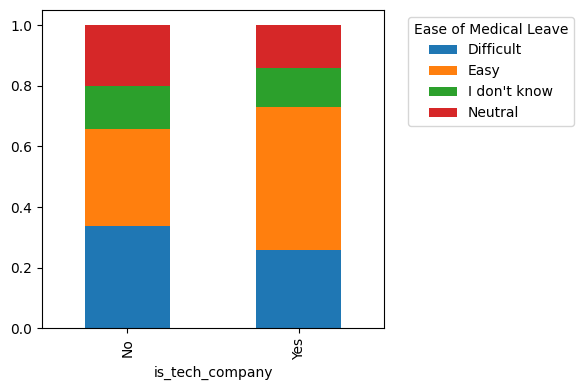

In [10]:
import matplotlib.pyplot as plt

ax = tech_vs_leave.plot(kind='bar', stacked=True, figsize=(6,4))

ax.legend(
    title='Ease of Medical Leave',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()



In [11]:
df['is_tech_company'] = df['is_tech_company'].replace({
    'Yes': 'Tech',
    'No': 'Non-Tech'
})


In [12]:
df['is_tech_company'] = df['is_tech_company'].fillna('Unknown')


In [13]:
df['is_tech_company'].value_counts()


,count
is_tech_company,
Tech,883
Unknown,287
Non-Tech,263


In [14]:
tech_vs_leave = pd.crosstab(
    df['is_tech_company'],
    df['ease_medical_leave_grouped'],
    normalize='index'
)

tech_vs_leave


ease_medical_leave_grouped,Difficult,Easy,I don't know,Neutral
is_tech_company,,,,
Non-Tech,0.338403,0.319392,0.140684,0.201521
Tech,0.258211,0.472254,0.127973,0.141563


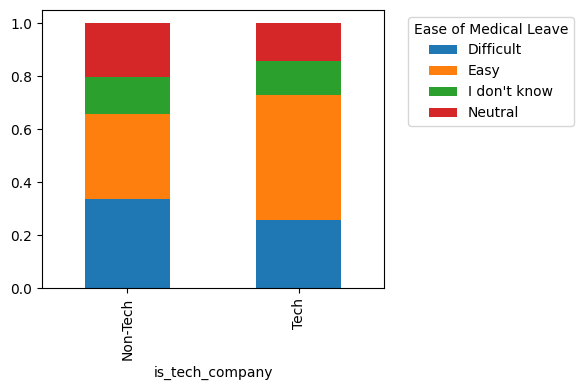

In [15]:
import matplotlib.pyplot as plt

ax = tech_vs_leave.plot(kind='bar', stacked=True, figsize=(6,4))

ax.legend(
    title='Ease of Medical Leave',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


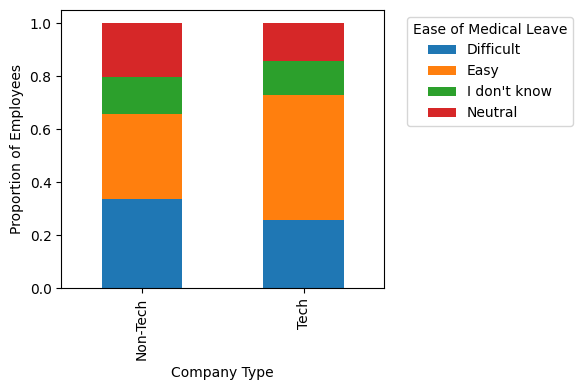

In [16]:
import matplotlib.pyplot as plt

ax = tech_vs_leave.plot(kind='bar', stacked=True, figsize=(6,4))

ax.set_ylabel('Proportion of Employees')
ax.set_xlabel('Company Type')
#ax.set_title('Ease of Requesting Medical Leave by Company Type')

ax.legend(
    title='Ease of Medical Leave',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [17]:
tech_vs_leave.to_csv('tech_vs_medical_leave.csv', index=False)


In [18]:
tableau_df = df[[
    'is_tech_company',
    'is_tech_role',
    'ease_medical_leave_grouped',
    'mental_health_benefits',
    'mental_health_discussion',
    'mental_health_resources',
    'remote_work',
    'gender',
    'company_size',
    'age',
    'work_country',
    'job_role'
]].copy()

# Optional: keep Unknown instead of NaN for cleaner Tableau filters
tableau_df = tableau_df.fillna('Unknown')

tableau_df.to_csv('osmi_tableau_clean.csv', index=False)
